In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import pi
%matplotlib notebook

In [27]:
N=10000;Nc=16
beta=100;
mu=0;
t=1
n=200
matsubara=(2*np.linspace(-n,n,2*n+1)+1)*np.pi/beta

In [28]:
KX=np.linspace(-pi,pi,int(np.sqrt(Nc))+1);KX=np.delete(KX,0);dK=KX[1]-KX[0];min_K=np.min(KX);max_K=np.max(KX)
KY=np.linspace(-pi,pi,int(np.sqrt(Nc))+1);KY=np.delete(KY,0)
KX,KY=np.meshgrid(KX,KY)

In [29]:
kx=np.linspace(-2*pi,2*pi,2*int(np.sqrt(N))+1);kx=np.delete(kx,0);min_k=np.min(kx);max_k=np.max(kx)
ky=np.linspace(-2*pi,2*pi,2*int(np.sqrt(N))+1);ky=np.delete(ky,0)
kx,ky=np.meshgrid(kx,ky)
E_k=2*t*(np.cos(kx)+np.cos(ky))


In [30]:
G0_k=np.empty((matsubara.size,kx.shape[0],kx.shape[1]),dtype=np.complex128)
for i in xrange(n):
    G0_k[i,:,:]=(1j*matsubara[i]+mu-E_k)**(-1)

In [31]:
G0_K=np.empty((matsubara.size,KX.shape[0],KX.shape[1]),dtype=np.complex128)
E_K=np.empty((KX.shape[0],KX.shape[1]))
for i in xrange(int(np.sqrt(Nc))):
    for j in xrange(int(np.sqrt(Nc))):  
            indexes=((kx>(KX[i,j]-dK/2.))&(kx<(KX[i,j]+dK/2.)))&((ky>(KY[i,j]-dK/2.))&(ky<(KY[i,j]+dK/2.)))   
            G0_K[:,i,j]=Nc*np.sum(G0_k[:,indexes],axis=1)/N
            E_K[i,j]=Nc*np.sum(E_k[indexes])/N
        

<IPython.core.display.Javascript object>


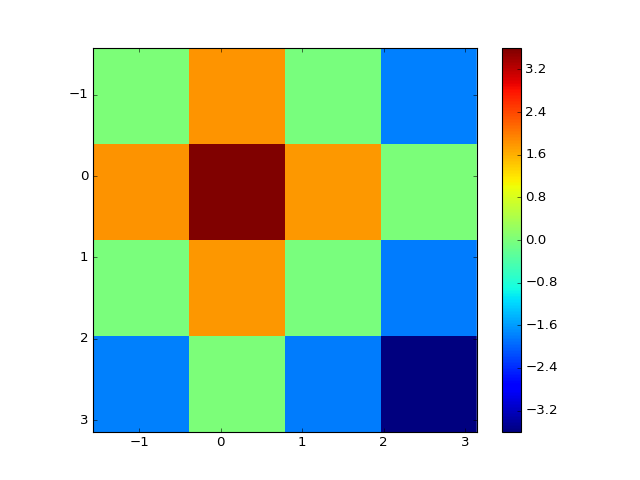

In [32]:
plt.figure()
plt.imshow(E_K,interpolation='None', extent=(min_K,max_K, max_K, min_K))
plt.colorbar()

In [208]:
np.min(E_K)/np.min(E_k)*t

0.63641031907547918

<IPython.core.display.Javascript object>


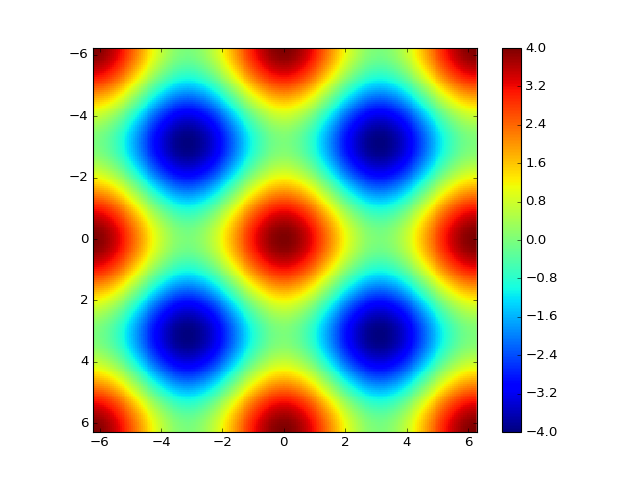

In [33]:
plt.figure()
plt.imshow(E_k,interpolation='None', extent=(min_k,max_k, max_k, min_k))
plt.colorbar()

In [36]:
Hyb_K=np.empty((matsubara.size,KX.shape[0],KX.shape[1]),dtype=np.complex128)
for i in xrange(int(np.sqrt(Nc))):
    for j in xrange(int(np.sqrt(Nc))):
         Hyb_K[:,i,j]=1j*matsubara+mu-E_K[i,j]-(G0_K[:,i,j])**(-1)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in reciprocal


In [37]:
Hyb_IJ=np.empty((matsubara.size,KX.shape[0],KX.shape[1]),dtype=np.complex128)
for i in xrange(matsubara.size):
    Hyb_IJ[i,:,:]=np.fft.fftshift(np.fft.fft2(Hyb_K[i,:,:]))

In [38]:
V=np.empty((KX.shape[0],KX.shape[1]))
V

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])